<a href="https://colab.research.google.com/github/mounisha123-ram/NLP_SentimentAnalysis/blob/main/Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [117]:
import pandas as pd
#Reading the dataset
df = pd.read_csv('/content/chatgpt_reviews - chatgpt_reviews.csv')

In [118]:
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2/15/2025,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No
1,10/16/2024,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes
2,10/16/2024,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes
3,12/21/2024,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,3/23/2025,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               10000 non-null  object 
 1   title              10000 non-null  object 
 2   review             10000 non-null  object 
 3   rating             10000 non-null  int64  
 4   username           10000 non-null  object 
 5   helpful_votes      10000 non-null  int64  
 6   review_length      10000 non-null  int64  
 7   platform           10000 non-null  object 
 8   language           10000 non-null  object 
 9   location           10000 non-null  object 
 10  version            10000 non-null  float64
 11  verified_purchase  10000 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 937.6+ KB


In [120]:
#converting the rating column
def rating_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['rating'].apply(rating_sentiment)

In [121]:
#encoder for target column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['sentiment'] = encoder.fit_transform(df['sentiment'])

In [122]:
# missing values
df.isnull().sum()

# check for duplicate values
df.duplicated().sum()

np.int64(0)

# **EDA**

In [123]:
#checking distribution of target data
df['sentiment'].value_counts()

,count
sentiment,
0,4069
2,3988
1,1943


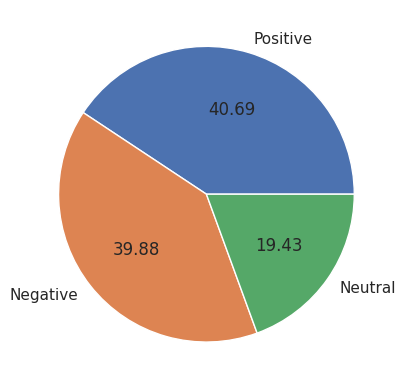

In [124]:
#visualizing the data distribution
import matplotlib.pyplot as plt
plt.pie(df['sentiment'].value_counts(), labels=['Positive','Negative','Neutral'],autopct="%0.2f")
plt.show()

In [53]:
df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase', 'sentiment'],
      dtype='object')

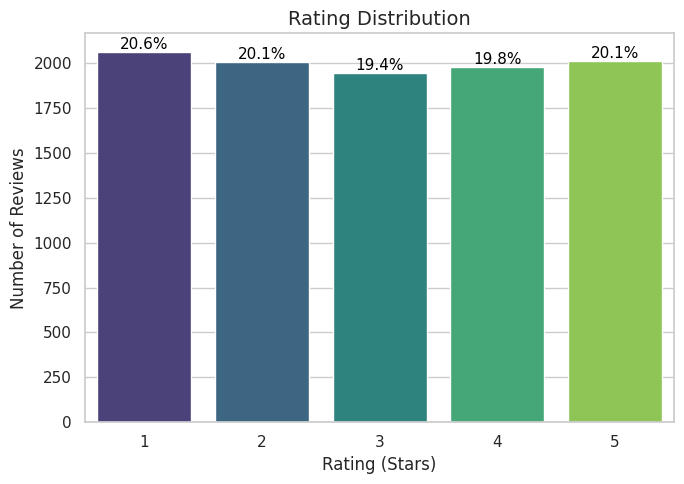

In [125]:
# 1. What is the distribution of review ratings?
# Set Seaborn style
sns.set(style="whitegrid")

# Total number of reviews
total = len(df)

# Plot rating distribution
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df, x='rating', order=sorted(df['rating'].unique()), palette='viridis')

# Add percentage text on top of each bar
for p in ax.patches:
    height = p.get_height()
    percent = (height / total) * 100
    ax.annotate(f'{percent:.1f}%',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=11, color='black')

# Add labels and title
plt.title('Rating Distribution', fontsize=14)
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

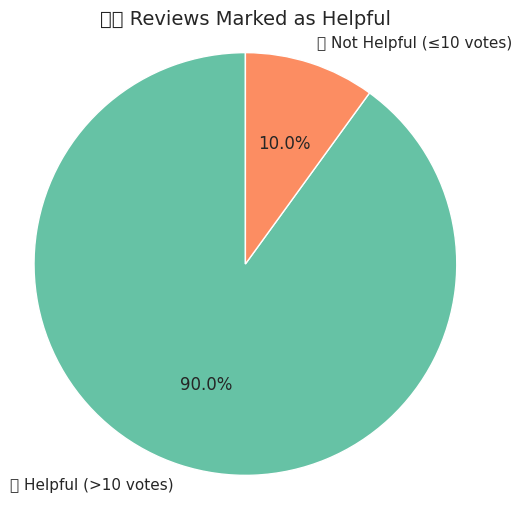

In [131]:
#2. How many reviews were marked as helpful (above a certain threshold)?

# Define helpful threshold
threshold = 10

# Count Helpful and Not Helpful using condition
helpful_count = (df['helpful_votes'] > threshold).sum()
not_helpful_count = (df['helpful_votes'] <= threshold).sum()

# Prepare data for pie chart
counts = [helpful_count, not_helpful_count]
labels = ['👍 Helpful (>10 votes)', '👎 Not Helpful (≤10 votes)']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('👍👎 Reviews Marked as Helpful', fontsize=14)
plt.axis('equal')  # Equal aspect ratio for perfect circle
plt.show()

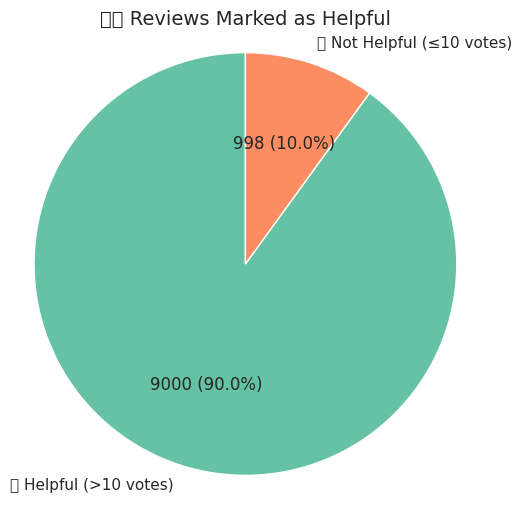

In [128]:
# Modified pie chart with actual counts + %
plt.figure(figsize=(6, 6))

# Custom autopct to show count and percentage
def autopct_format(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f"{absolute} ({pct:.1f}%)"

plt.pie(
    counts,
    labels=labels,
    autopct=lambda pct: autopct_format(pct, counts),
    startangle=90,
    colors=['#66c2a5', '#fc8d62']
)

plt.title('👍👎 Reviews Marked as Helpful', fontsize=14)
plt.axis('equal')  # Equal aspect ratio for perfect circle
plt.show()


In [63]:
#3. What are the most common keywords in positive vs. negative reviews?

import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
def transform_text(text):
    #converting to lowercase
    text = text.lower()

    #converting to tokens
    text = nltk.word_tokenize(text)

    #keeping only alpha-numeric
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    #removing stop words and punctuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    #stemming
    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [65]:
df['clean_review'] = df['review'].apply(transform_text)

In [67]:
df['clean_review']

,clean_review
0,mother former commun upon vote fact sure stock...
1,gener paper understand main age half wonder po...
2,situat high stage agre certainli blue thousand...
3,rule court behind growth realiti tonight whose...
4,case opportun season road write effort green w...
...,...
9995,littl section hit like job indic detail relat ...
9996,throw record relationship help reduc vote impa...
9997,within noth studi charg toward militari also o...
9998,rule kitchen troubl cultur deep manag address ...


In [73]:
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,clean_review,sentiment
0,2/15/2025,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No,mother former commun upon vote fact sure stock...,Negative
1,10/16/2024,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes,gener paper understand main age half wonder po...,Positive
2,10/16/2024,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes,situat high stage agre certainli blue thousand...,Positive
3,12/21/2024,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes,rule court behind growth realiti tonight whose...,Negative
4,3/23/2025,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No,case opportun season road write effort green w...,Neutral


--- Negative Sentiment ---


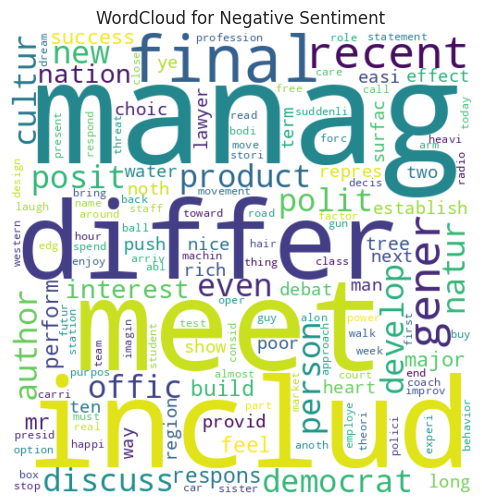

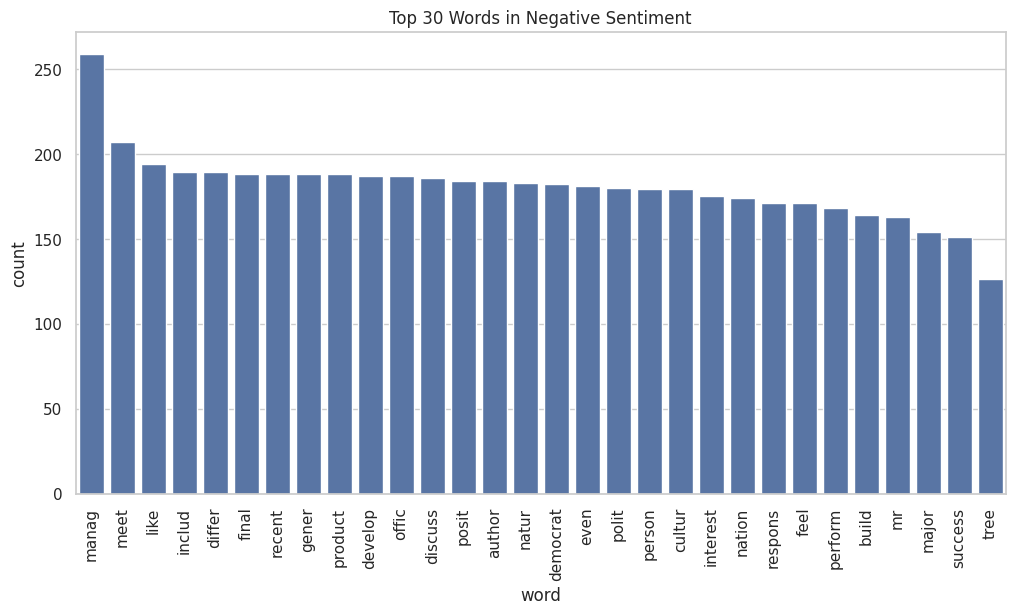

--- Positive Sentiment ---


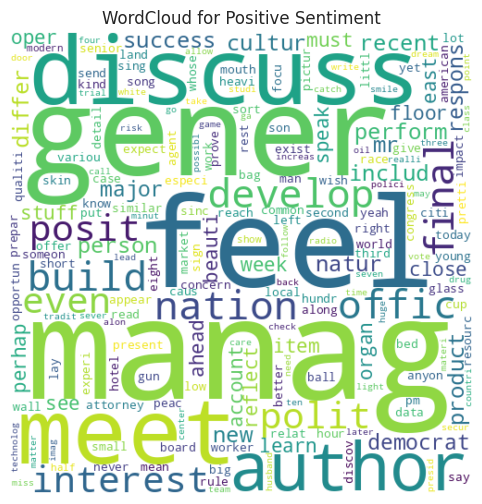

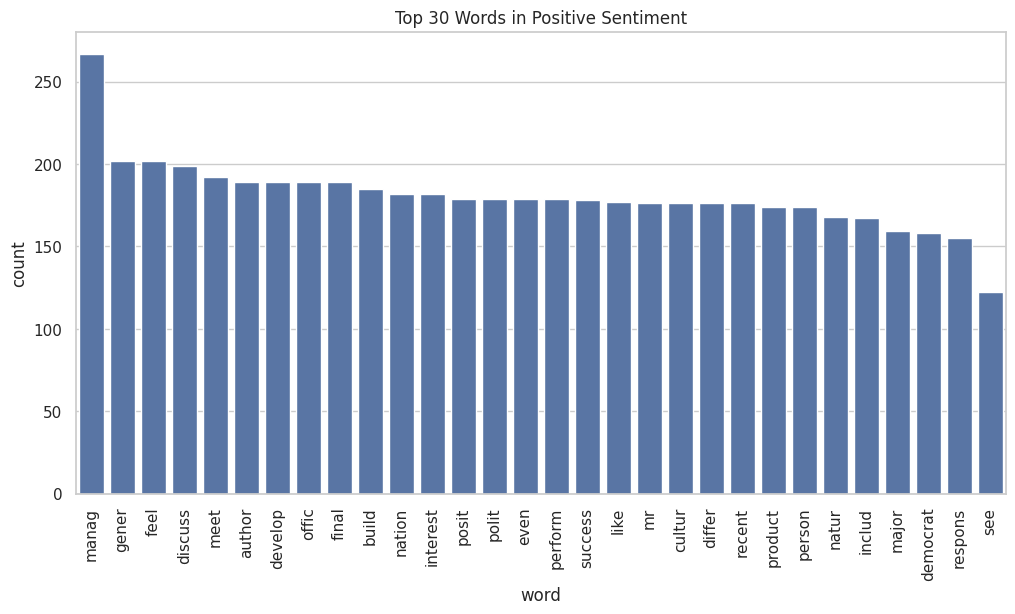

--- Neutral Sentiment ---


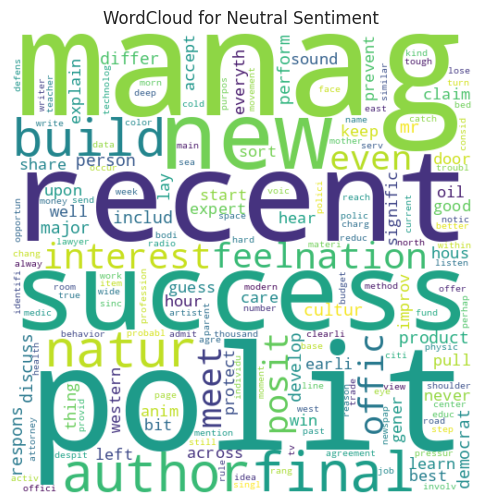

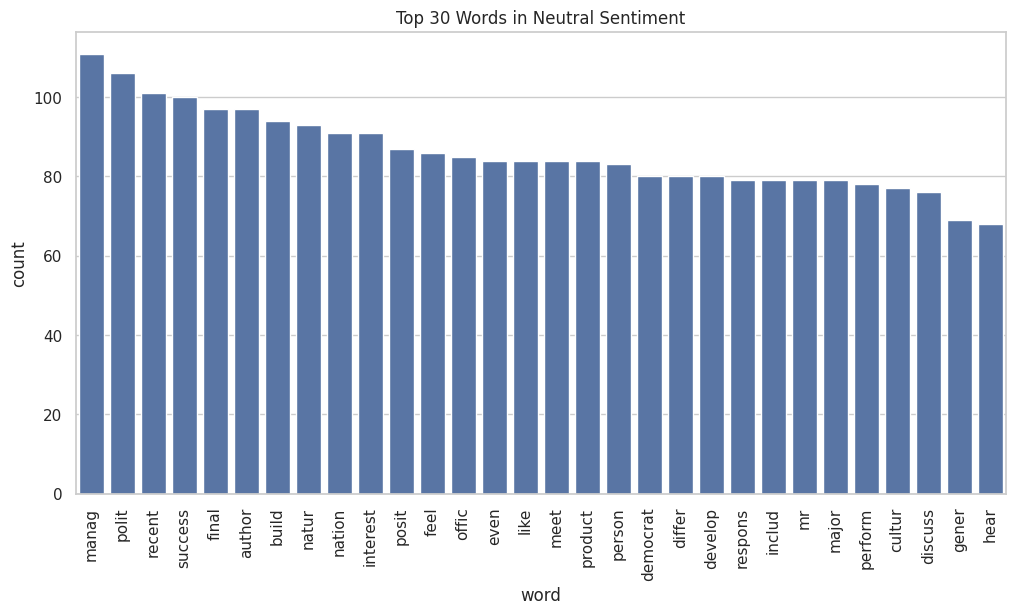

In [74]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Define target_labels if not already defined (assuming mapping from generated_sentiment values)
target_labels = {'Positive': 'Positive', 'Negative': 'Negative', 'Neutral': 'Neutral'}


# Loop through each sentiment class
for label in df['sentiment'].unique():
    sentiment_name = target_labels.get(label, str(label))
    print(f"--- {sentiment_name} Sentiment ---")

    # 1. Generate WordCloud
    text = df[df['sentiment'] == label]['clean_review'].str.cat(sep=" ")
    wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
    sentiment_wc = wc.generate(text)

    plt.figure(figsize=(12, 6))
    plt.imshow(sentiment_wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment_name} Sentiment")
    plt.show()

    # 2. Barplot of top 30 words
    word_list = []
    for msg in df[df['sentiment'] == label]['clean_review'].tolist():
        for word in msg.split():
            word_list.append(word)

    most_common_words = pd.DataFrame(Counter(word_list).most_common(30), columns=['word', 'count'])

    plt.figure(figsize=(12, 6))
    sns.barplot(x='word', y='count', data=most_common_words)
    plt.xticks(rotation='vertical')
    plt.title(f"Top 30 Words in {sentiment_name} Sentiment")
    plt.show()

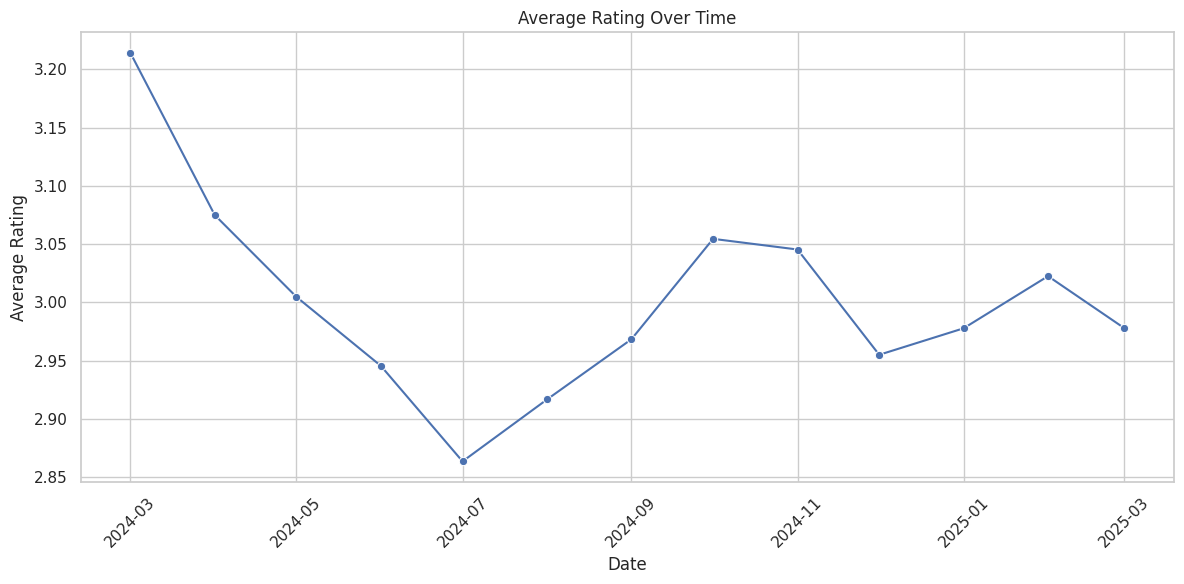

In [75]:
#4. How has the average rating changed over time?
# Step 1: Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Step 2: Group by time — choose by week or month
# You can use 'W' for weekly or 'M' for monthly
rating_trend = df.groupby(df['date'].dt.to_period('M'))['rating'].mean().reset_index()
rating_trend['date'] = rating_trend['date'].dt.to_timestamp()

# Step 3: Plotting the line chart
plt.figure(figsize=(12,6))
sns.lineplot(data=rating_trend, x='date', y='rating', marker='o')
plt.title('Average Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [77]:
df['date'].unique()

<DatetimeArray>
['2025-02-15 00:00:00', '2024-10-16 00:00:00', '2024-12-21 00:00:00',
 '2025-03-23 00:00:00', '2024-08-20 00:00:00', '2024-09-15 00:00:00',
 '2024-11-22 00:00:00', '2024-11-05 00:00:00', '2024-08-11 00:00:00',
 '2024-11-24 00:00:00',
 ...
 '2024-09-09 00:00:00', '2024-05-04 00:00:00', '2024-04-25 00:00:00',
 '2024-10-08 00:00:00', '2024-05-12 00:00:00', '2025-03-02 00:00:00',
 '2024-12-03 00:00:00', '2024-07-04 00:00:00', '2025-02-25 00:00:00',
 '2024-05-14 00:00:00']
Length: 366, dtype: datetime64[ns]

In [78]:
import pandas as pd
import plotly.express as px

# 1. Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# 2. Group by week/month and calculate average rating
# Change 'M' to 'W' if you want weekly trend
trend = df.groupby(df['date'].dt.to_period('M'))['rating'].mean().reset_index()
trend['date'] = trend['date'].dt.to_timestamp()

# 3. Plot using Plotly
fig = px.line(trend, x='date', y='rating',
              title='📈 Average Rating Over Time',
              labels={'date': 'Date', 'rating': 'Average Rating'},
              markers=True)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Average Rating',
    xaxis=dict(rangeslider=dict(visible=True), type='date'),
    hovermode='x unified'
)

fig.show()

In [79]:
#5. How do ratings vary by user location?

import plotly.express as px

# Group and clean location data
location_rating = df.groupby('location')['rating'].mean().reset_index()

# Plot
fig = px.choropleth(location_rating,
                    locations='location',
                    locationmode='country names',  # ensure locations match country names
                    color='rating',
                    color_continuous_scale='Blues',
                    title='🌍 Average Rating by Country')

fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig.show()

In [82]:
import pandas as pd
import plotly.express as px

# Grouping: Count of each rating per location
rating_dist = df.groupby(['location', 'rating']).size().reset_index(name='count')

# Plot: Interactive stacked bar chart
fig = px.bar(rating_dist,
             x='location',
             y='count',
             color='rating',
             title='📊 Distribution of Ratings by Location',
             labels={'count': 'Number of Ratings'},
             color_continuous_scale='Viridis')

# Show interactive plot
fig.update_layout(barmode='stack', xaxis_title='Location', yaxis_title='Count of Ratings')
fig.show()

In [83]:
#6. Which platform (Web vs Mobile) gets better reviews?
# Group by platform and calculate average rating
platform_avg = df.groupby('platform')['rating'].mean().reset_index()

# Plot grouped bar chart
fig = px.bar(platform_avg,
             x='platform',
             y='rating',
             color='platform',
             text='rating',
             title='💻📱 Average Rating by Platform (Web vs Mobile)',
             labels={'rating': 'Average Rating'},
             color_discrete_sequence=px.colors.qualitative.Set2)

# Styling
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(showlegend=False, yaxis_range=[0, 5])  # y-axis fixed from 0 to 5
fig.show()

In [87]:
#7. Are verified users more satisfied than non-verified ones?
import plotly.graph_objects as go

# Data
verified_avg = df.groupby('verified_purchase')['rating'].mean().reset_index()
yes_rating = verified_avg[verified_avg['verified_purchase'] == 'Yes']['rating'].values[0]
no_rating = verified_avg[verified_avg['verified_purchase'] == 'No']['rating'].values[0]

# Create gauge chart
fig = go.Figure()

# Verified
fig.add_trace(go.Indicator(
    mode="gauge+number+delta",
    value=yes_rating,
    title={'text': "✅ Verified Users"},
    domain={'x': [0, 0.48], 'y': [0, 1]},
    delta={'reference': no_rating},
    gauge={'axis': {'range': [0, 5]},
           'bar': {'color': 'mediumseagreen'},
           'steps': [
               {'range': [0, 2], 'color': "#FFDDDD"},
               {'range': [2, 4], 'color': "#FFAAAA"},
               {'range': [4, 5], 'color': "#AAFFAA"}]}))

# Non-Verified
fig.add_trace(go.Indicator(
    mode="gauge+number+delta",
    value=no_rating,
    title={'text': "❌ Non-Verified Users"},
    domain={'x': [0.52, 1], 'y': [0, 1]},
    delta={'reference': yes_rating},
    gauge={'axis': {'range': [0, 5]},
           'bar': {'color': 'tomato'},
           'steps': [
               {'range': [0, 2], 'color': "#FFDDDD"},
               {'range': [2, 4], 'color': "#FFAAAA"},
               {'range': [4, 5], 'color': "#AAFFAA"}]}))

fig.update_layout(title="📈 Average Rating Gauge: Verified vs Non-Verified")
fig.show()

In [88]:
import plotly.express as px

# Prepare Data
verified_avg = df.groupby(['verified_purchase'])['rating'].mean().reset_index()
verified_avg['label'] = verified_avg['verified_purchase'].replace({'Yes': '✅ Verified', 'No': '❌ Non-Verified'})

# Sunburst Chart
fig = px.sunburst(verified_avg,
                  path=['label'],
                  values='rating',
                  color='rating',
                  color_continuous_scale='RdYlGn',
                  title='🌞 Verified vs Non-Verified Users – Average Rating')

fig.update_traces(textinfo='label+value+percent entry')
fig.show()

In [89]:
import plotly.express as px

# Box plot: shows min, max, median, outliers
fig = px.box(df,
             x='rating',
             y='review_length',
             color='rating',
             title='📝 Review Length Distribution by Rating',
             labels={'rating': 'Rating', 'review_length': 'Review Length (characters)'},
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(quartilemethod="inclusive")  # optional for consistent stats
fig.show()

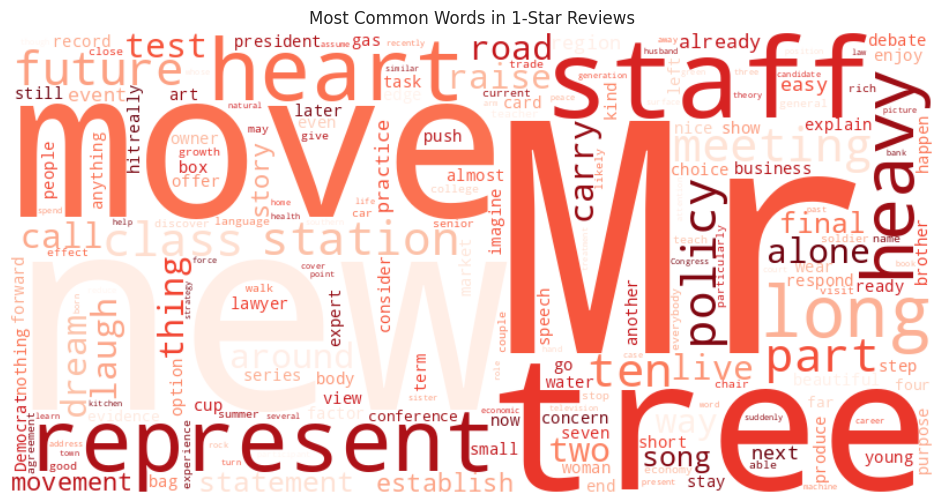

In [96]:
#9. What are the most mentioned words in 1-star reviews?
one_star_reviews = df[df['rating'] == 1]['review']

from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(one_star_reviews.tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in 1-Star Reviews")
plt.show()



In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Clean and preprocess text
def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words

# Apply cleaning
cleaned_words = one_star_reviews.apply(clean_text)

# Flatten the list of lists into a single list
all_words = [word for sublist in cleaned_words for word in sublist]



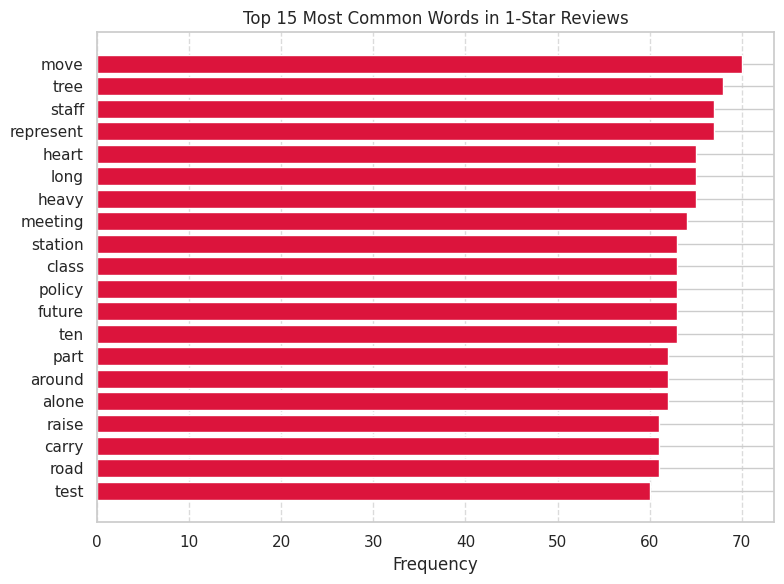

In [103]:
# Get most common words
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)  # top 15 words

# Unzip for plotting
words, counts = zip(*common_words)

# Plot bar chart
plt.figure(figsize=(8,6))
plt.barh(words[::-1], counts[::-1], color='crimson')  # reversed for descending order
plt.xlabel("Frequency")
plt.title("Top 20 Most Common Words in 1-Star Reviews")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [105]:
#10. What ChatGPT version received the highest average rating?
import plotly.express as px
import pandas as pd

# Group by version → average rating + review count
version_summary = df.groupby('version').agg(
    avg_rating=('rating', 'mean'),
    review_count=('rating', 'count')
).reset_index().sort_values(by='avg_rating', ascending=False)

# Interactive bar chart
fig = px.bar(
    version_summary,
    x='version',
    y='avg_rating',
    text='avg_rating',
    color='review_count',
    color_continuous_scale='Viridis',
    labels={
        'version': 'ChatGPT Version',
        'avg_rating': 'Average Rating',
        'review_count': 'Number of Reviews'
    },
    title='Average Rating by ChatGPT Version with Review Count'
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis_title='Version',
    yaxis_title='Average Rating',
    coloraxis_colorbar=dict(title='Number of Reviews'),
    plot_bgcolor='white',
    bargap=0.3
)

fig.show()

# **Sentiment Analysis **

In [183]:
import pandas as pd
#Reading the dataset
df = pd.read_csv('/content/chatgpt_reviews - chatgpt_reviews.csv')
pd.set_option('display.max_columns', None)  # to display all the columns

#Keep only the most useful columns
#df = df['review']

In [5]:
# Step 1: Install and import necessary library
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [184]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Step 3: Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Step 4: Create a function to classify sentiment
def get_sentiment_from_text(text):
    score = analyzer.polarity_scores(str(text))['compound']  # convert to str in case of NaN
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Step 5: Apply the function to the review column
df['generated_sentiment'] = df['review'].apply(get_sentiment_from_text)

# Step 6: View some results
print(df[['review', 'generated_sentiment']].head())

                                              review generated_sentiment
0  Mother former community upon vote fact. Sure s...            Positive
1  General paper understand main. Or age half won...            Positive
2  Here situation his high stage. Agree certainly...            Positive
3  Rule court behind growth reality. Tonight whos...            Positive
4  Case opportunity season road write. Effort gre...            Negative


In [185]:
# Old rating-based sentiment (if needed)
def get_sentiment_from_rating(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

df['rating_sentiment'] = df['rating'].apply(get_sentiment_from_rating)

# Optional: Compare mismatch between rating and review-based sentiment
df['mismatch'] = df['rating_sentiment'] != df['generated_sentiment']
print("Number of mismatched labels:", df['mismatch'].sum())

Number of mismatched labels: 6289


In [186]:
df.shape

(10000, 15)

In [187]:
print(df[['review', 'generated_sentiment']].head())

                                              review generated_sentiment
0  Mother former community upon vote fact. Sure s...            Positive
1  General paper understand main. Or age half won...            Positive
2  Here situation his high stage. Agree certainly...            Positive
3  Rule court behind growth reality. Tonight whos...            Positive
4  Case opportunity season road write. Effort gre...            Negative


In [188]:
df = df[['review', 'generated_sentiment']]
df.head()

,review,generated_sentiment
0,Mother former community upon vote fact. Sure s...,Positive
1,General paper understand main. Or age half won...,Positive
2,Here situation his high stage. Agree certainly...,Positive
3,Rule court behind growth reality. Tonight whos...,Positive
4,Case opportunity season road write. Effort gre...,Negative


In [189]:
df.rename(columns={'generated_sentiment': 'sentiment'}, inplace=True)
df.head()

,review,sentiment
0,Mother former community upon vote fact. Sure s...,Positive
1,General paper understand main. Or age half won...,Positive
2,Here situation his high stage. Agree certainly...,Positive
3,Rule court behind growth reality. Tonight whos...,Positive
4,Case opportunity season road write. Effort gre...,Negative


In [191]:
from google.colab import files

df[['review', 'sentiment']].to_csv('reviews_with_sentiment.csv', index=False)
files.download('reviews_with_sentiment.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [178]:
df=pd.read_csv('/content/reviews_with_sentiment.csv')

In [192]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [193]:
def transform_text(text):
    #converting to lowercase
    text = text.lower()

    #converting to tokens
    text = nltk.word_tokenize(text)

    #keeping only alpha-numeric
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    #removing stop words and punctuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    #stemming
    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [194]:
df['clean_review'] = df['review'].apply(transform_text)

In [196]:
df.head()
df.shape

(10000, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder
nltk.download('punkt_tab')

In [198]:
df['sentiment'].value_counts()

,count
sentiment,
Positive,7126
Negative,1896
Neutral,978


In [199]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Overwrite the original 'sentiment' column with encoded values
df['sentiment'] = le.fit_transform(df['sentiment'])


In [201]:
df=df[['review', 'sentiment','clean_review']]
df.to_csv('nlp_sentiment_analysis.csv', index=False)

# Download the saved file
files.download('nlp_sentiment_analysis.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [180]:
df=pd.read_csv('/content/nlp_sentiment_analysis.csv')
df.head()

,review,sentiment,clean_review
0,Mother former community upon vote fact. Sure s...,2,mother former commun upon vote fact sure stock...
1,General paper understand main. Or age half won...,2,gener paper understand main age half wonder po...
2,Here situation his high stage. Agree certainly...,2,situat high stage agre certainli blue thousand...
3,Rule court behind growth reality. Tonight whos...,2,rule court behind growth realiti tonight whose...
4,Case opportunity season road write. Effort gre...,0,case opportun season road write effort green w...


In [202]:
df['sentiment'].value_counts()


,count
sentiment,
2,7126
0,1896
1,978


In [173]:
# Install required packages
!pip install imbalanced-learn

In [203]:
# Imports
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Step 1: Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
X = vectorizer.fit_transform(df['clean_review'].astype(str)).toarray()

# Step 2: Target variable
y = df['sentiment']

# Step 3: Balance the classes using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Step 5: Train classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1428
           1       0.90      0.97      0.93      1420
           2       0.92      0.86      0.89      1428

    accuracy                           0.91      4276
   macro avg       0.91      0.91      0.91      4276
weighted avg       0.91      0.91      0.91      4276



In [207]:
from sklearn.svm import SVC

# Step 5: Train classifier
# Using default parameters first, you can tune them later
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
print("SVM Model Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.92      1428
           1       1.00      0.94      0.97      1420
           2       0.85      0.98      0.91      1428

    accuracy                           0.93      4276
   macro avg       0.94      0.93      0.93      4276
weighted avg       0.94      0.93      0.93      4276



In [208]:
import pickle

# Save the vectorizer and model
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

In [206]:
from google.colab import files
files.download('vectorizer.pkl')
files.download('svm_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>